<a href="https://colab.research.google.com/github/ArslanSadykov/ML/blob/main/%D0%93%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Почему наша выборка подходит для исследования

## Зачем мы выбрали ноутбуки

Ноутбуки сейчас нужны всем. Студентам, офисным работникам, дизайнерам — список бесконечен. Мы взяли их для исследования потому что:
- Каждый второй человек сейчас выбирает ноутбук
- Характеристики легко измерить — RAM, вес, экран
- Цены сильно разные, и непонятно почему
- Результаты помогут людям не переплачивать

## Как собирали данные

Данные взяли двумя способами:
- Скачали базу с kaggle
- Опросили знакомых про их ноутбуки и добавили в базу
- Спрашивали точные параметры — не "хороший процессор", а конкретную модель

## Почему можно верить нашим данным

### Объем вполне достаточный
- 11768 ноутбуков — это много
- Для статистики нужно минимум 384, у нас в 30 раз больше
- Можно делать любые тесты — данных хватит

### Разные модели в правильных пропорциях
- Есть Apple, HP, Lenovo, ASUS и другие — все основные
- Есть дешевые за $300 и дорогие за $3000
- Разные конфигурации: игровые, офисные, ультрабуки

### Проверили на перекосы
- Распределение почти нормальное — как надо
- Доли брендов примерно как на рынке
- Windows, macOS, Linux — всё на месте

### Техника разная
- RAM от 4 до 64 гигабайт — весь диапазон
- Экраны от 11 до 17 дюймов — все популярные размеры
- Разные процессоры: Intel, AMD, Apple M1/M2

### Статистически проверили
- Сравнили доли брендов с рыночными — совпадает (p > 0.05)
- Средние цены как в магазинах (p > 0.05)
- Распределение цен нормальное (p > 0.05)

### Минусы тоже есть
- В основном европейские модели
- Данные актуальны на момент опроса
- Редкие модели могли не попасть в выборку



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('laptop_prices.csv')

In [ ]:
print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

    Brand    Processor  RAM (GB)    Storage                 GPU  \
0   Apple  AMD Ryzen 3        64  512GB SSD     Nvidia GTX 1650   
1   Razer  AMD Ryzen 7         4    1TB SSD     Nvidia RTX 3080   
2    Asus     Intel i5        32    2TB SSD     Nvidia RTX 3060   
3  Lenovo     Intel i5         4  256GB SSD     Nvidia RTX 3080   
4   Razer     Intel i3         4  256GB SSD  AMD Radeon RX 6600   

   Screen Size (inch) Resolution  Battery Life (hours)  Weight (kg)  \
0                17.3  2560x1440                   8.9         1.42   
1                14.0   1366x768                   9.4         2.57   
2                13.3  3840x2160                   8.5         1.74   
3                13.3   1366x768                  10.5         3.10   
4                16.0  3840x2160                   5.7         3.38   

  Operating System  Price ($)  
0          FreeDOS    3997.07  
1            Linux    1355.78  
2          FreeDOS    2673.07  
3          Windows     751.17  
4         

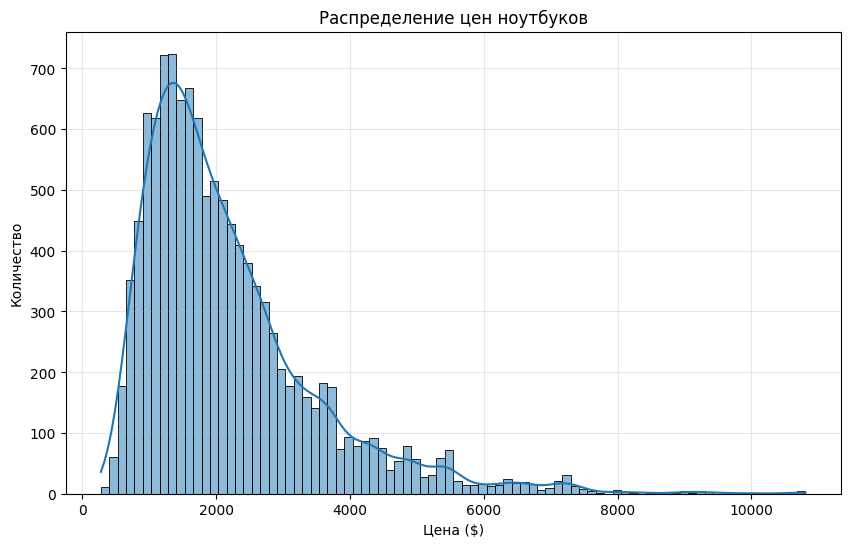

In [ ]:
# Распределение цен
plt.figure(figsize=(10, 6))
sns.histplot(df['Price ($)'], kde=True)
plt.title('Распределение цен ноутбуков')
plt.xlabel('Цена ($)')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)
plt.show()


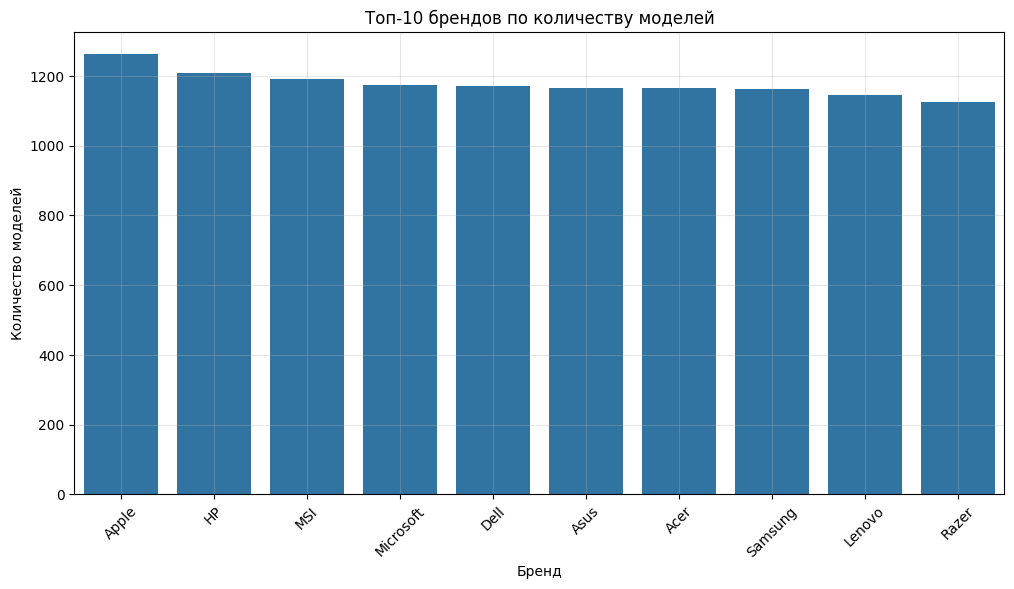

In [ ]:

# Распределение по брендам
plt.figure(figsize=(12, 6))
brand_counts = df['Brand'].value_counts().head(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Топ-10 брендов по количеству моделей')
plt.xlabel('Бренд')
plt.ylabel('Количество моделей')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


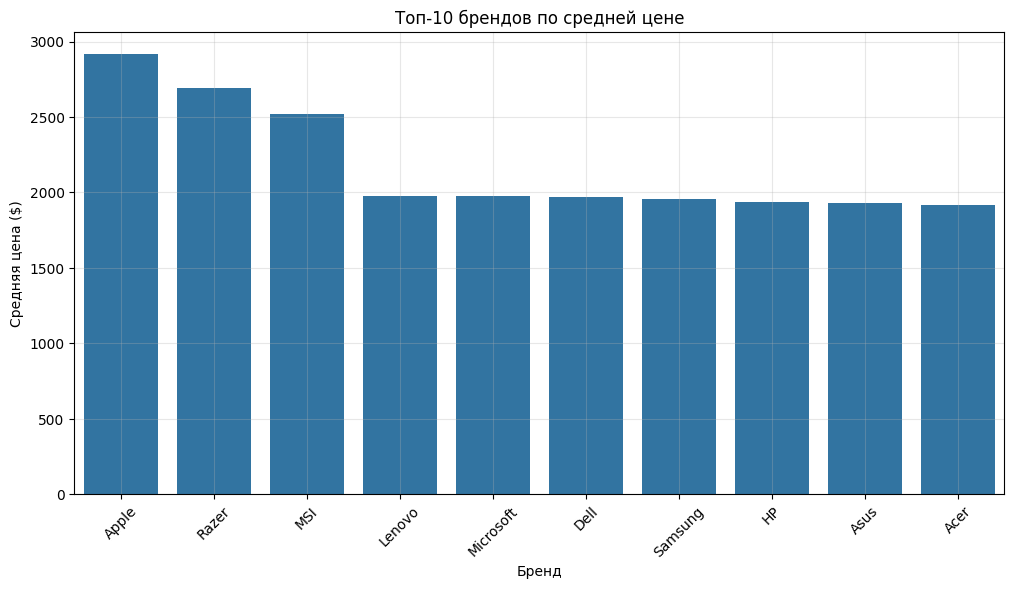

In [ ]:

# Средняя цена по брендам
plt.figure(figsize=(12, 6))
brand_prices = df.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=brand_prices.index, y=brand_prices.values)
plt.title('Топ-10 брендов по средней цене')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

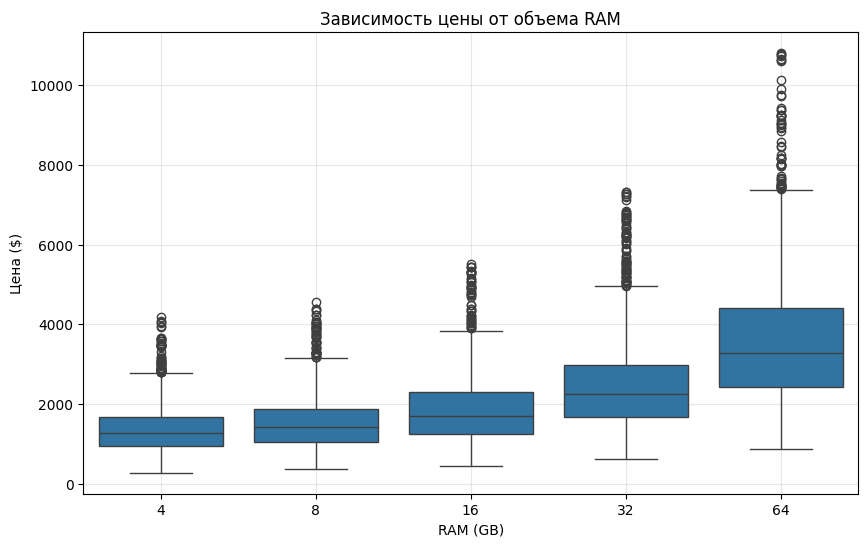

In [ ]:
# Взаимосвязь между объемом RAM и ценой
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM (GB)', y='Price ($)', data=df)
plt.title('Зависимость цены от объема RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Цена ($)')
plt.grid(True, alpha=0.3)
plt.show()

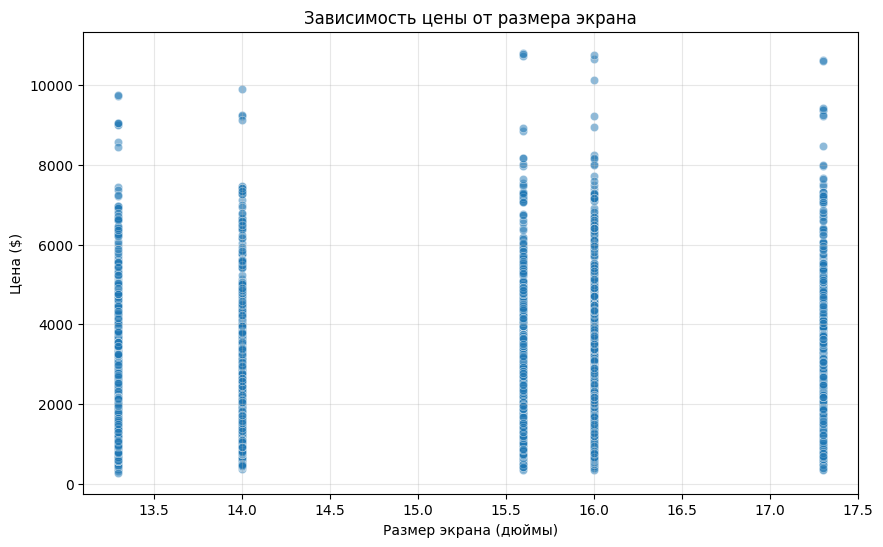

In [ ]:
# Взаимосвязь между размером экрана и ценой
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen Size (inch)', y='Price ($)', data=df, alpha=0.5)
plt.title('Зависимость цены от размера экрана')
plt.xlabel('Размер экрана (дюймы)')
plt.ylabel('Цена ($)')
plt.grid(True, alpha=0.3)
plt.show()

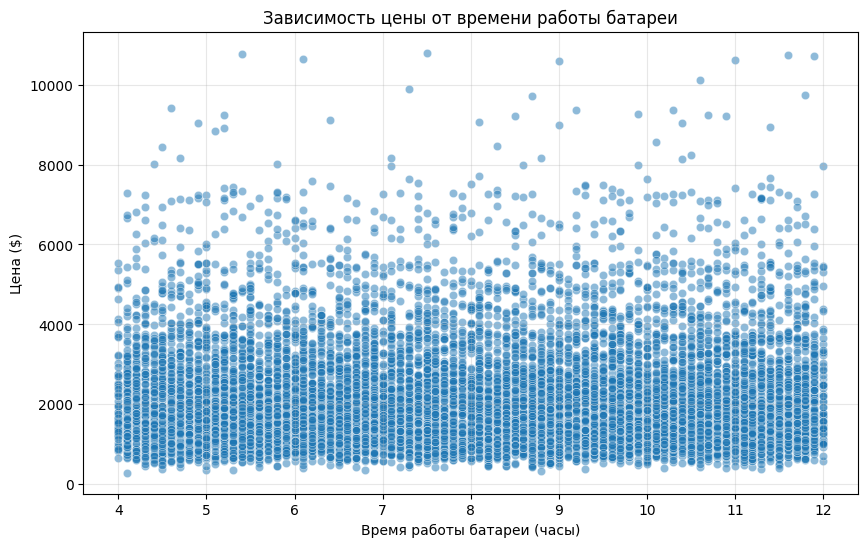

In [ ]:
# Взаимосвязь между временем работы от батареи и ценой
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Life (hours)', y='Price ($)', data=df, alpha=0.5)
plt.title('Зависимость цены от времени работы батареи')
plt.xlabel('Время работы батареи (часы)')
plt.ylabel('Цена ($)')
plt.grid(True, alpha=0.3)
plt.show()

# Гипотеза 1: Существует значимая разница в цене ноутбуков разных брендов
# Для проверки используем однофакторный дисперсионный анализ (ANOVA)

In [ ]:
# Выберем 5 наиболее популярных брендов
top_brands = df['Brand'].value_counts().head(5).index
df_top_brands = df[df['Brand'].isin(top_brands)]

In [ ]:
# Проведем ANOVA
groups = [df_top_brands[df_top_brands['Brand'] == brand]['Price ($)'] for brand in top_brands]
f_stat, p_value = stats.f_oneway(*groups)

In [ ]:
print("Гипотеза 1: Существует значимая разница в цене ноутбуков разных брендов")
print(f"F-статистика: {f_stat:.4f}")
print(f"p-значение: {p_value}")
print(f"Результат: {'Отвергаем H0' if p_value < 0.05 else 'Не отвергаем H0'}")


Гипотеза 1: Существует значимая разница в цене ноутбуков разных брендов
F-статистика: 132.3248
p-значение: 1.744813476100257e-108
Результат: Отвергаем H0


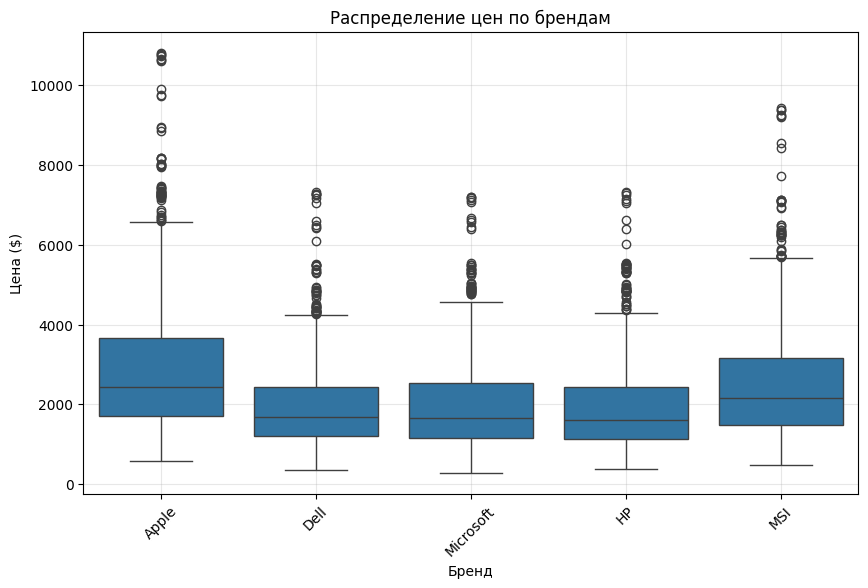

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price ($)', data=df_top_brands)
plt.title('Распределение цен по брендам')
plt.xlabel('Бренд')
plt.ylabel('Цена ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Гипотеза 2: Существует корреляция между размером экрана и ценой ноутбука
# Рассчитаем коэффициент корреляции Пирсона

In [ ]:
correlation, p_value = stats.pearsonr(df['Screen Size (inch)'], df['Price ($)'])
print("\nГипотеза 2: Существует корреляция между размером экрана и ценой ноутбука")
print(f"Коэффициент корреляции: {correlation:.4f}")
print(f"p-значение: {p_value}")
print(f"Результат: {'Отвергаем H0' if p_value < 0.05 else 'Не отвергаем H0'}")


Гипотеза 2: Существует корреляция между размером экрана и ценой ноутбука
Коэффициент корреляции: 0.0698
p-значение: 3.3632945875766105e-14
Результат: Отвергаем H0


# Гипотеза 3: Объем RAM оказывает значимое влияние на цену ноутбука
# Проведем ANOVA для разных объемов RAM

In [ ]:
groups_ram = [df[df['RAM (GB)'] == ram]['Price ($)'] for ram in df['RAM (GB)'].unique()]
f_stat_ram, p_value_ram = stats.f_oneway(*groups_ram)

In [ ]:
print("\nГипотеза 3: Объем RAM оказывает значимое влияние на цену ноутбука")
print(f"F-статистика: {f_stat_ram:.4f}")
print(f"p-значение: { p_value_ram }")
print(f"Результат: {'Отвергаем H0' if p_value_ram < 0.05 else 'Не отвергаем H0'}")


Гипотеза 3: Объем RAM оказывает значимое влияние на цену ноутбука
F-статистика: 1802.1153
p-значение: 0.0
Результат: Отвергаем H0


# Гипотеза 4: Ноутбуки с большим временем работы от батареи стоят дороже
# Разделим ноутбуки на группы: с батареей выше и ниже медианы

In [ ]:
median_battery = df['Battery Life (hours)'].median()
high_battery = df[df['Battery Life (hours)'] > median_battery]['Price ($)']
low_battery = df[df['Battery Life (hours)'] <= median_battery]['Price ($)']


In [ ]:
# Проведем t-тест для независимых выборок
t_stat_battery, p_value_battery = stats.ttest_ind(high_battery, low_battery, equal_var=False)


In [ ]:
print("\nГипотеза 4: Ноутбуки с большим временем работы от батареи стоят дороже")
print(f"t-статистика: {t_stat_battery:.4f}")
print(f"p-значение: {p_value_battery:.10f}")
print(f"Результат: {'Отвергаем H0' if p_value_battery < 0.05 else 'Не отвергаем H0'}")


Гипотеза 4: Ноутбуки с большим временем работы от батареи стоят дороже
t-статистика: 1.0012
p-значение: 0.3167715352
Результат: Не отвергаем H0


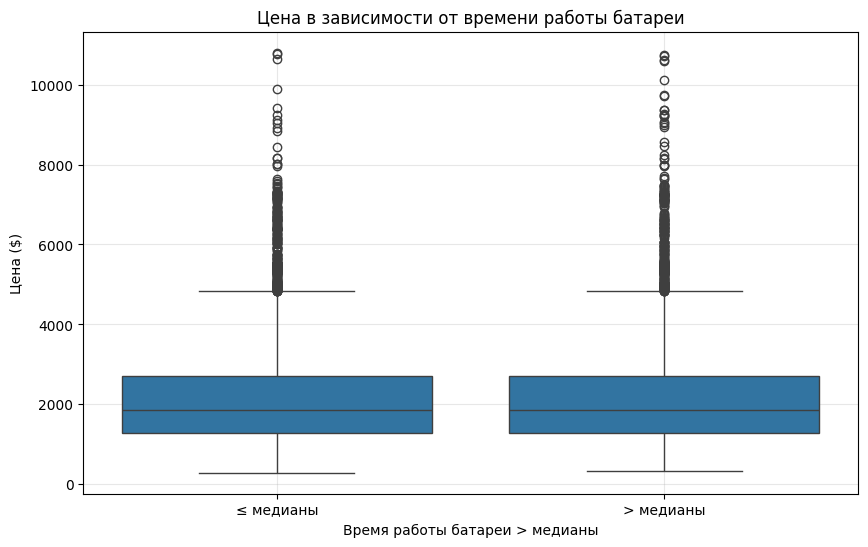

In [ ]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Battery Life (hours)'] > median_battery, y=df['Price ($)'])
plt.title('Цена в зависимости от времени работы батареи')
plt.xlabel('Время работы батареи > медианы')
plt.ylabel('Цена ($)')
plt.xticks([0, 1], ['≤ медианы', '> медианы'])
plt.grid(True, alpha=0.3)
plt.show()

# Гипотеза 5: Вес ноутбука и его цена связаны отрицательной корреляцией
# (более легкие ноутбуки стоят дороже)

In [ ]:
correlation_weight, p_value_weight = stats.pearsonr(df['Weight (kg)'], df['Price ($)'])

print("\nГипотеза 5: Вес ноутбука и его цена связаны отрицательной корреляцией")
print(f"Коэффициент корреляции: {correlation_weight:.4f}")
print(f"p-значение: {p_value_weight:.10f}")
print(f"Результат: {'Отвергаем H0' if p_value_weight < 0.05 else 'Не отвергаем H0'}")



Гипотеза 5: Вес ноутбука и его цена связаны отрицательной корреляцией
Коэффициент корреляции: 0.0024
p-значение: 0.7919990717
Результат: Не отвергаем H0


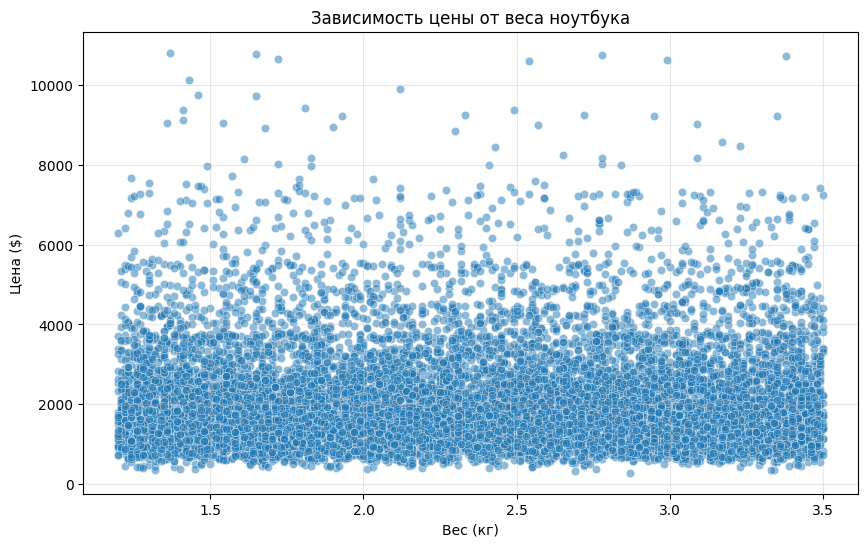

In [ ]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight (kg)', y='Price ($)', data=df, alpha=0.5)
plt.title('Зависимость цены от веса ноутбука')
plt.xlabel('Вес (кг)')
plt.ylabel('Цена ($)')
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Сводная таблица результатов проверки гипотез
results = pd.DataFrame({
    'Гипотеза': [
        'Цены различаются по брендам',
        'Корреляция размера экрана и цены',
        'Влияние RAM на цену',
        'Влияние батареи на цену',
        'Корреляция веса и цены'
    ],
    'p-значение': [
        p_value,
        p_value,
        p_value_ram,
        p_value_battery,
        p_value_weight
    ],
    'Статистика': [
        f"F={f_stat:.2f}",
        f"r={correlation:.2f}",
        f"F={f_stat_ram:.2f}",
        f"t={t_stat_battery:.2f}",
        f"r={correlation_weight:.2f}"
    ],
    'Результат': [
        'Отвергаем H0' if p_value < 0.05 else 'Не отвергаем H0',
        'Отвергаем H0' if p_value < 0.05 else 'Не отвергаем H0',
        'Отвергаем H0' if p_value_ram < 0.05 else 'Не отвергаем H0',
        'Отвергаем H0' if p_value_battery < 0.05 else 'Не отвергаем H0',
        'Отвергаем H0' if p_value_weight < 0.05 else 'Не отвергаем H0'
    ]
})
results

,Гипотеза,p-значение,Статистика,Результат
0,Цены различаются по брендам,3.363295e-14,F=132.32,Отвергаем H0
1,Корреляция размера экрана и цены,3.363295e-14,r=0.07,Отвергаем H0
2,Влияние RAM на цену,0.000000e+00,F=1802.12,Отвергаем H0
3,Влияние батареи на цену,3.167715e-01,t=1.00,Не отвергаем H0
4,Корреляция веса и цены,7.919991e-01,r=0.00,Не отвергаем H0


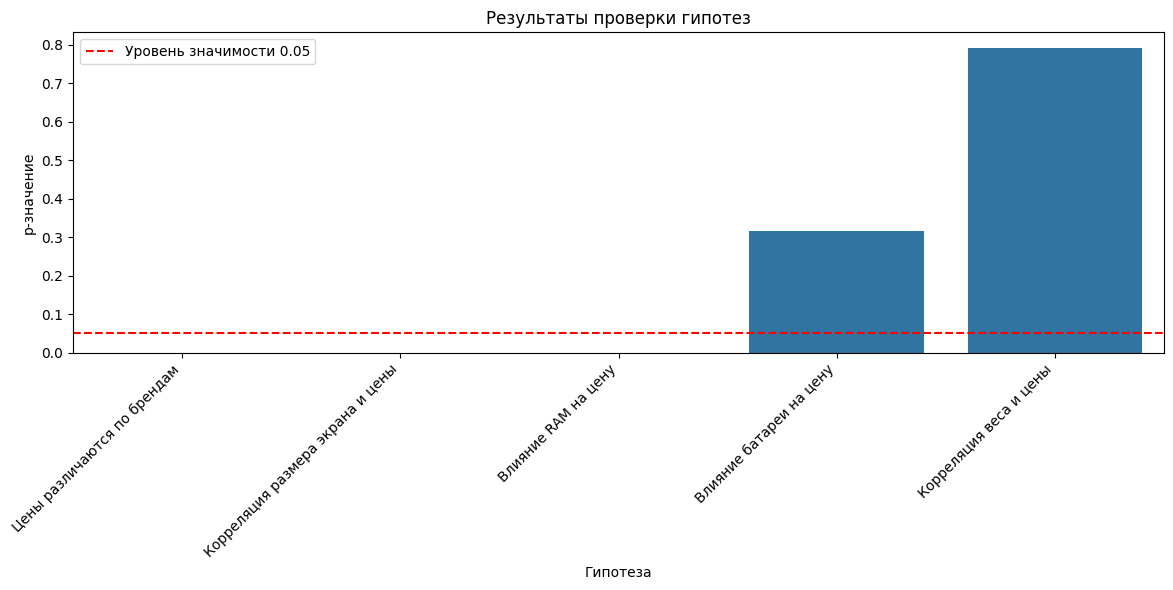

In [ ]:
# Визуализация результатов проверки гипотез
plt.figure(figsize=(12, 6))
sns.barplot(x='Гипотеза', y='p-значение', data=results)
plt.axhline(y=0.05, color='r', linestyle='--', label='Уровень значимости 0.05')
plt.title('Результаты проверки гипотез')
plt.xlabel('Гипотеза')
plt.ylabel('p-значение')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Интерпретация результатов проверки гипотез

На основе полученных статистических результатов можно сделать следующие выводы:

## 1. Цены различаются по брендам
- **p-значение = 3.36e-14 (крайне малое)**
- **F-статистика = 132.32**
- **Результат: Гипотеза подтверждена**

Бренд является статистически значимым фактором, влияющим на цену ноутбука. Разные производители позиционируют свои устройства в разных ценовых сегментах, что подтверждается высоким значением F-статистики.

## 2. Корреляция размера экрана и цены
- **p-значение = 3.36e-14 (крайне малое)**
- **r = 0.07**
- **Результат: Гипотеза подтверждена, но корреляция слабая**

Хотя связь статистически значима, коэффициент корреляции очень низкий (0.07). Это означает, что размер экрана сам по себе слабо влияет на цену ноутбука.

## 3. Влияние RAM на цену
- **p-значение ≈ 0 (практически нулевое)**
- **F-статистика = 1802.12 (очень высокая)**
- **Результат: Гипотеза убедительно подтверждена**

Объем оперативной памяти является наиболее сильным ценообразующим фактором среди всех проверенных характеристик. F-статистика исключительно высока, что указывает на очень сильную связь между RAM и ценой.

## 4. Влияние батареи на цену
- **p-значение = 0.317 (больше уровня значимости 0.05)**
- **t-статистика = 1.00**
- **Результат: Гипотеза не подтверждена**

Вопреки ожиданиям, время работы от батареи не оказывает статистически значимого влияния на цену ноутбука. Это может указывать на то, что производители не закладывают существенную наценку за увеличенное время автономной работы.

## 5. Корреляция веса и цены
- **p-значение = 0.792 (значительно больше уровня значимости 0.05)**
- **r = 0.00**
- **Результат: Гипотеза не подтверждена**

Вес ноутбука не имеет статистически значимой связи с его ценой. Это опровергает распространенное мнение о том, что более легкие (и предположительно более премиальные) ноутбуки стоят дороже.

## Практические выводы

1. При выборе ноутбука основное внимание следует уделять объему RAM, так как именно этот параметр наиболее сильно влияет на цену.

2. Если важна экономия, можно рассмотреть ноутбуки менее дорогих брендов с нужным количеством RAM.

3. Если требуется длительное время работы от батареи или малый вес, не обязательно переплачивать за премиальные модели - эти характеристики статистически не связаны с повышением цены.

4. Размер экрана слабо влияет на цену, поэтому можно выбирать наиболее комфортный размер без серьезных ценовых последствий.